In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
df

,beta,exponential,normal_p,normal_l
0,59.544350,9.441884,9.657494,7.285359
1,42.398229,2.739878,10.759717,1.613671
2,34.775481,6.509894,8.496316,-1.743088
3,22.559206,1.398424,7.743115,-6.994159
4,41.098623,11.936168,8.335448,4.594337
...,...,...,...,...
995,59.489683,4.198993,14.297836,11.270384
996,52.241287,15.742956,8.639846,20.773336
997,56.136953,1.569744,8.615560,-1.500313
998,50.931200,1.608302,7.664501,24.090245


In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

<AxesSubplot: ylabel='Density'>

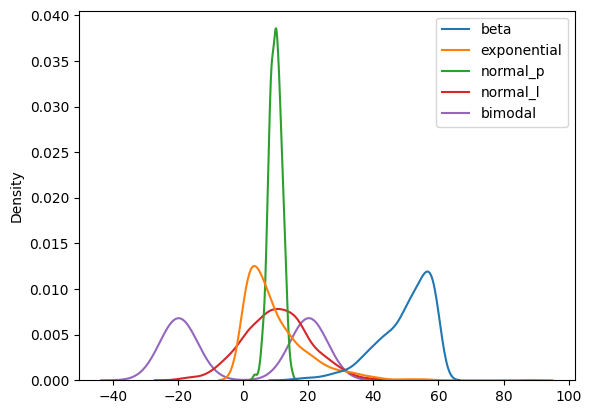

In [5]:
sns.kdeplot(data=df)

<AxesSubplot: ylabel='Density'>

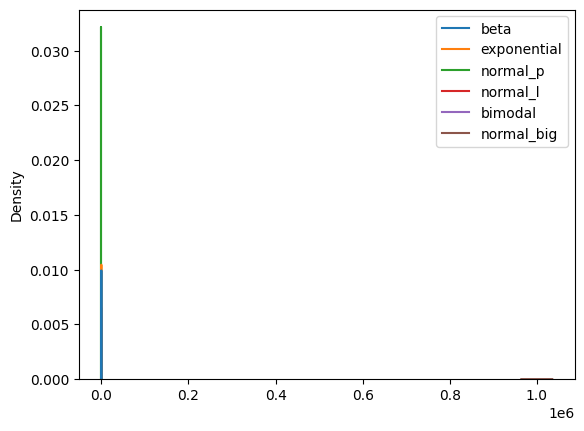

In [6]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot: >

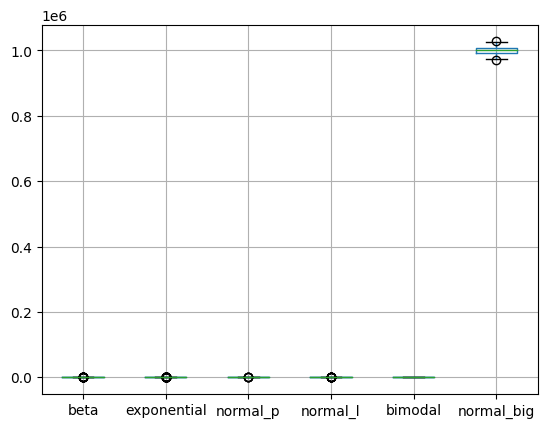

In [7]:
df.boxplot()

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()
#Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

<AxesSubplot: >

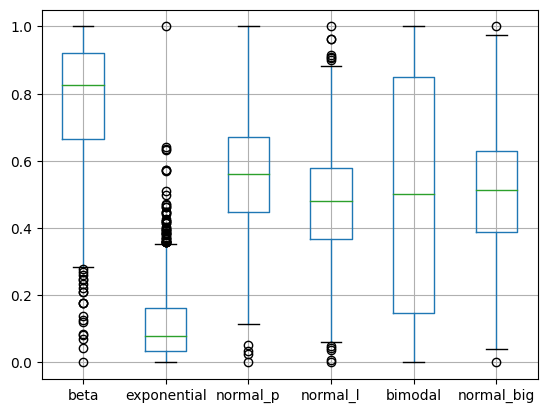

In [11]:
df_s.boxplot()

<AxesSubplot: ylabel='Density'>

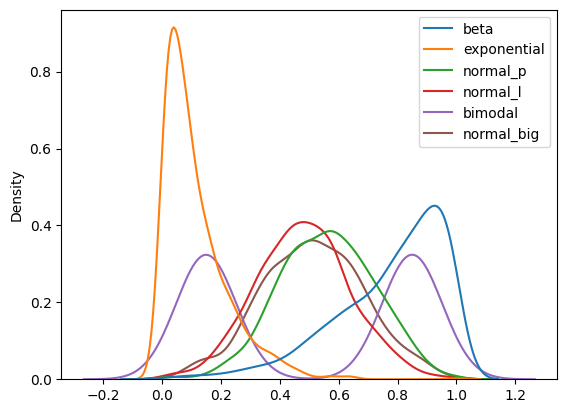

In [12]:
sns.kdeplot(data=df_s)

In [13]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,49.827009,10.003020,9.935357,10.437480,0.211300,1.000354e+06
std,8.526908,9.719780,1.929756,10.019329,20.175286,9.796828e+03
min,14.552769,0.001997,3.230716,-19.548513,-28.321823,9.716046e+05
25%,44.736286,2.872042,8.582333,3.540352,-19.892456,9.933806e+05
50%,51.991164,6.925517,9.964695,10.542372,0.358585,1.000383e+06
75%,56.421517,14.208157,11.273424,16.728143,20.158687,1.007043e+06
max,59.985992,87.600234,15.214693,43.167484,28.774431,1.027832e+06


In [14]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.776397,0.114169,0.559467,0.478124,0.499737,0.511307
std,0.187680,0.110959,0.161028,0.159757,0.353356,0.174234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.664349,0.032764,0.446564,0.368150,0.147634,0.387281
50%,0.824031,0.079037,0.561915,0.479796,0.502317,0.511823
75%,0.921545,0.162174,0.671122,0.578427,0.849101,0.630271
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
